**Assignment 3**

Submitted by:

Noa Magrisso - 206934978

Shaked Tayouri - 323866749

# Initial Steps

## Drive Connecting

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Installations & Imports

Add folder to path in order to load from the check_packages.py script:

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/ML_Exercise3')
sys.path.insert(0, '..')

Installations

In [ ]:
!pip install tensorflow scikit-learn tensorflow.keras

Imports

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

Check recommended package versions:

In [ ]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
}
check_packages(d)

[OK] Your Python version is 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
[OK] numpy 1.26.4
[OK] matplotlib 3.10.0
[OK] sklearn 1.6.1


# Chapter 11 - Implementing a Multi-layer Artificial Neural Network from Scratch

### Overview

- [Modeling complex functions with artificial neural networks](#Modeling-complex-functions-with-artificial-neural-networks)
  - [Single-layer neural network recap](#Single-layer-neural-network-recap)
  - [Introducing the multi-layer neural network architecture](#Introducing-the-multi-layer-neural-network-architecture)
  - [Activating a neural network via forward propagation](#Activating-a-neural-network-via-forward-propagation)
- [Classifying handwritten digits](#Classifying-handwritten-digits)
  - [Obtaining the MNIST dataset](#Obtaining-the-MNIST-dataset)
  - [Implementing a multi-layer perceptron](#Implementing-a-multi-layer-perceptron)
  - [Coding the neural network training loop](#Coding-the-neural-network-training-loop)
  - [Evaluating the neural network performance](#Evaluating-the-neural-network-performance)
- [Training an artificial neural network](#Training-an-artificial-neural-network)
  - [Computing the loss function](#Computing-the-loss-function)
  - [Developing your intuition for backpropagation](#Developing-your-intuition-for-backpropagation)
  - [Training neural networks via backpropagation](#Training-neural-networks-via-backpropagation)
- [Convergence in neural networks](#Convergence-in-neural-networks)
- [Summary](#Summary)

In [ ]:
from IPython.display import Image
%matplotlib inline

# Modeling complex functions with artificial neural networks

## Single-layer neural network recap

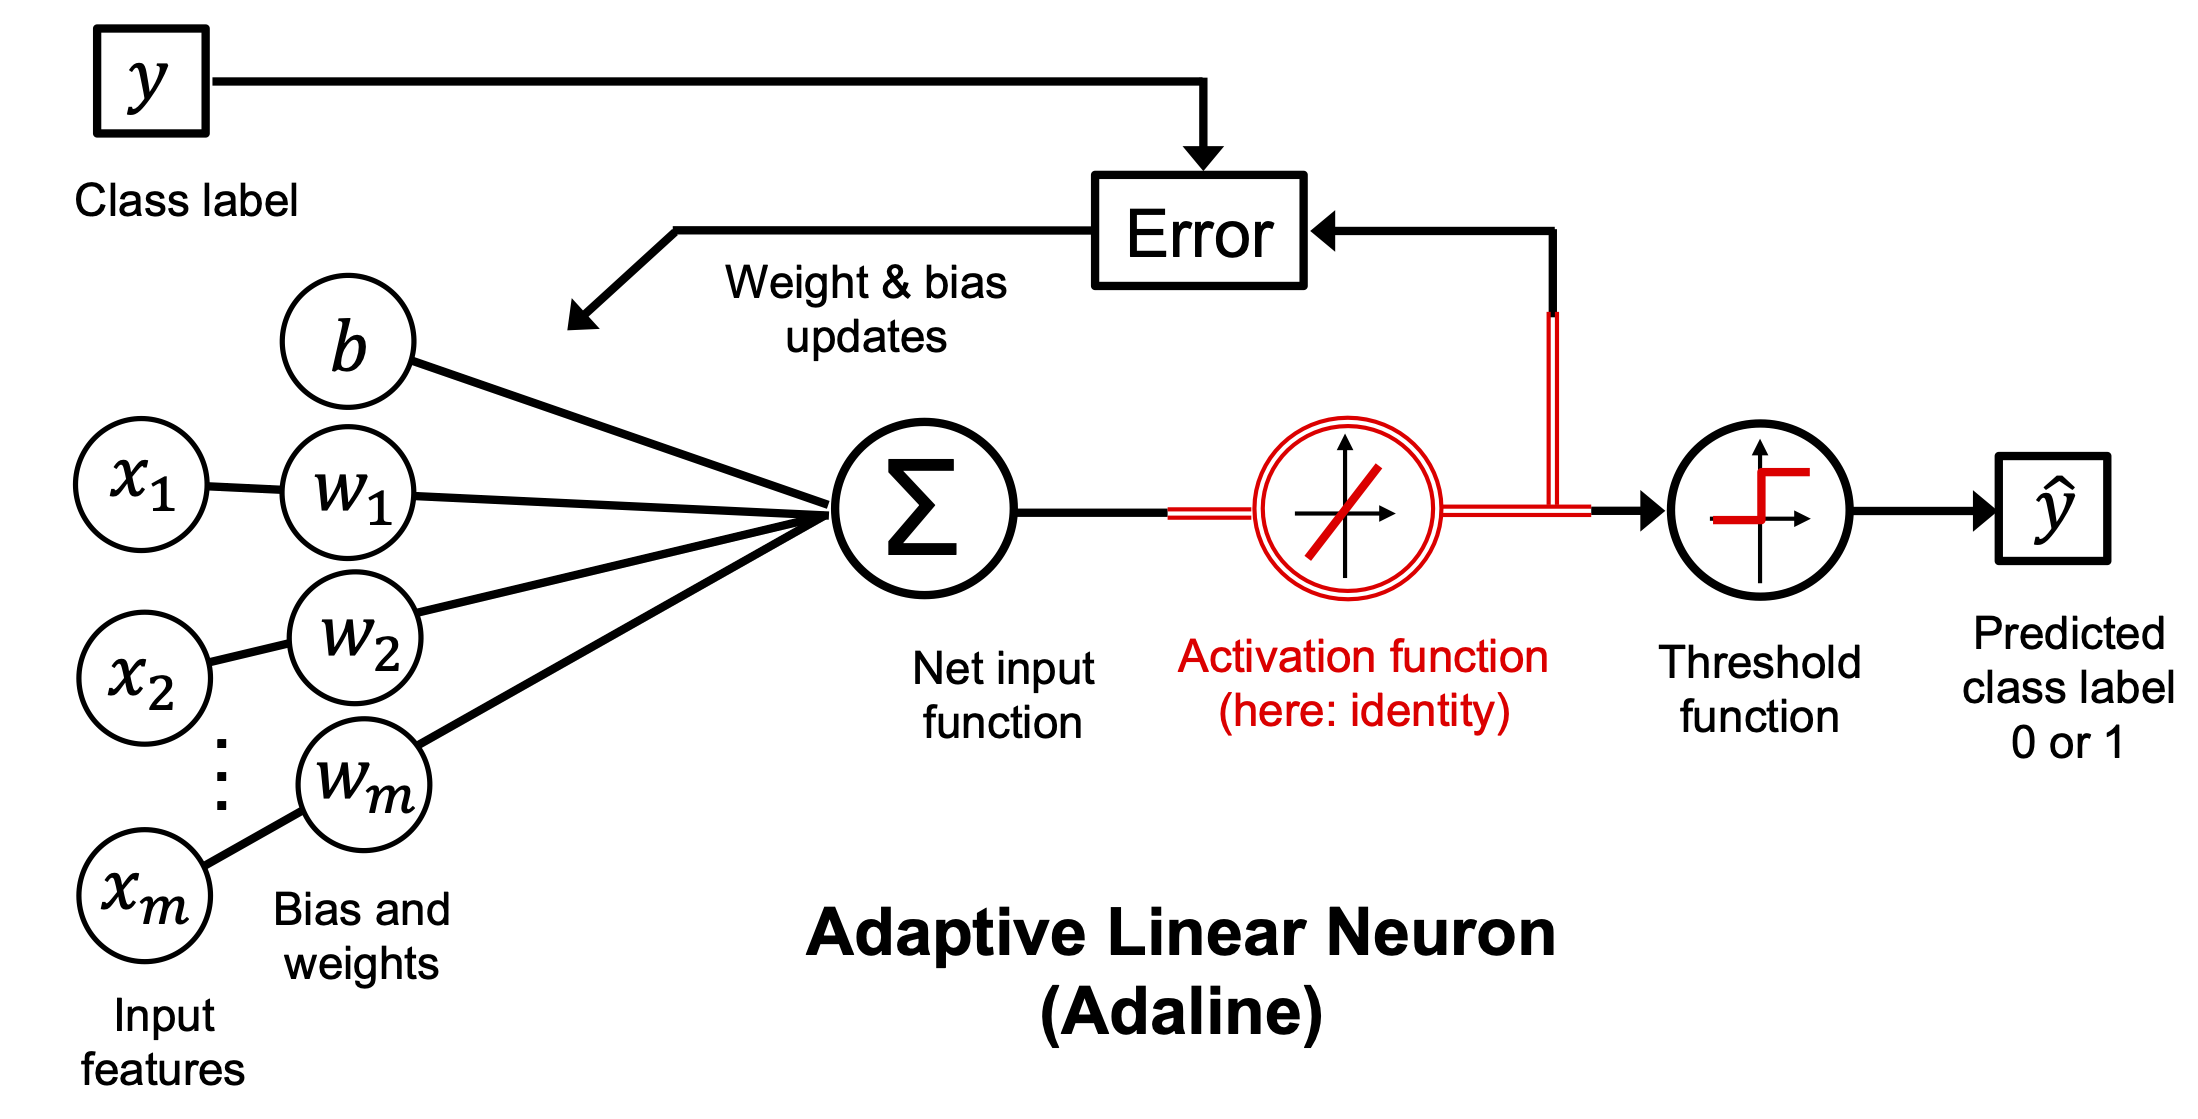

In [ ]:
Image(filename='/content/drive/MyDrive/ML_Exercise3/figures/11_01.png', width=600)

## Introducing the multi-layer neural network architecture

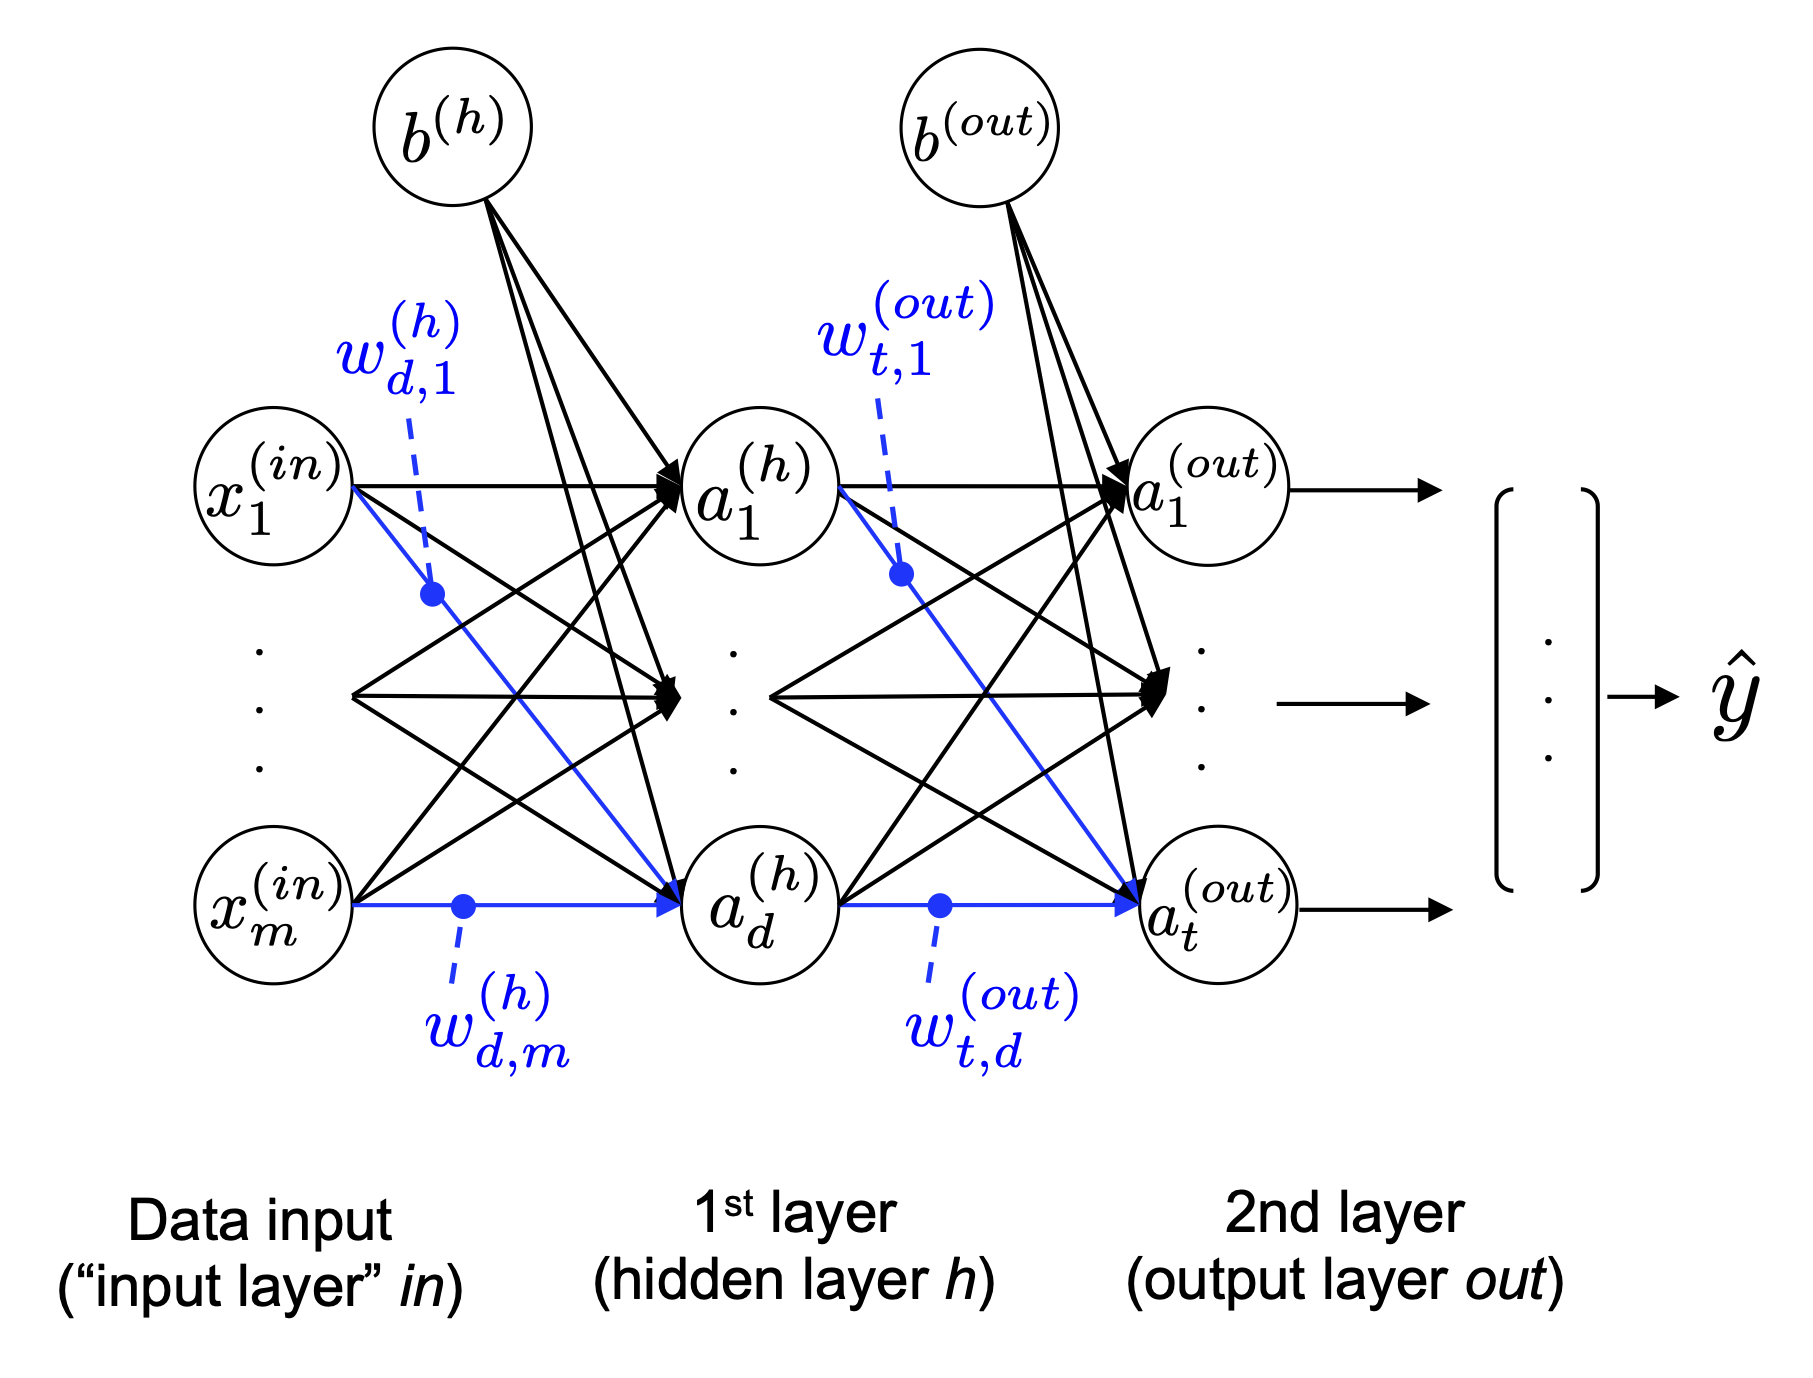

In [ ]:
Image(filename='/content/drive/MyDrive/ML_Exercise3/figures/11_02.png', width=600)

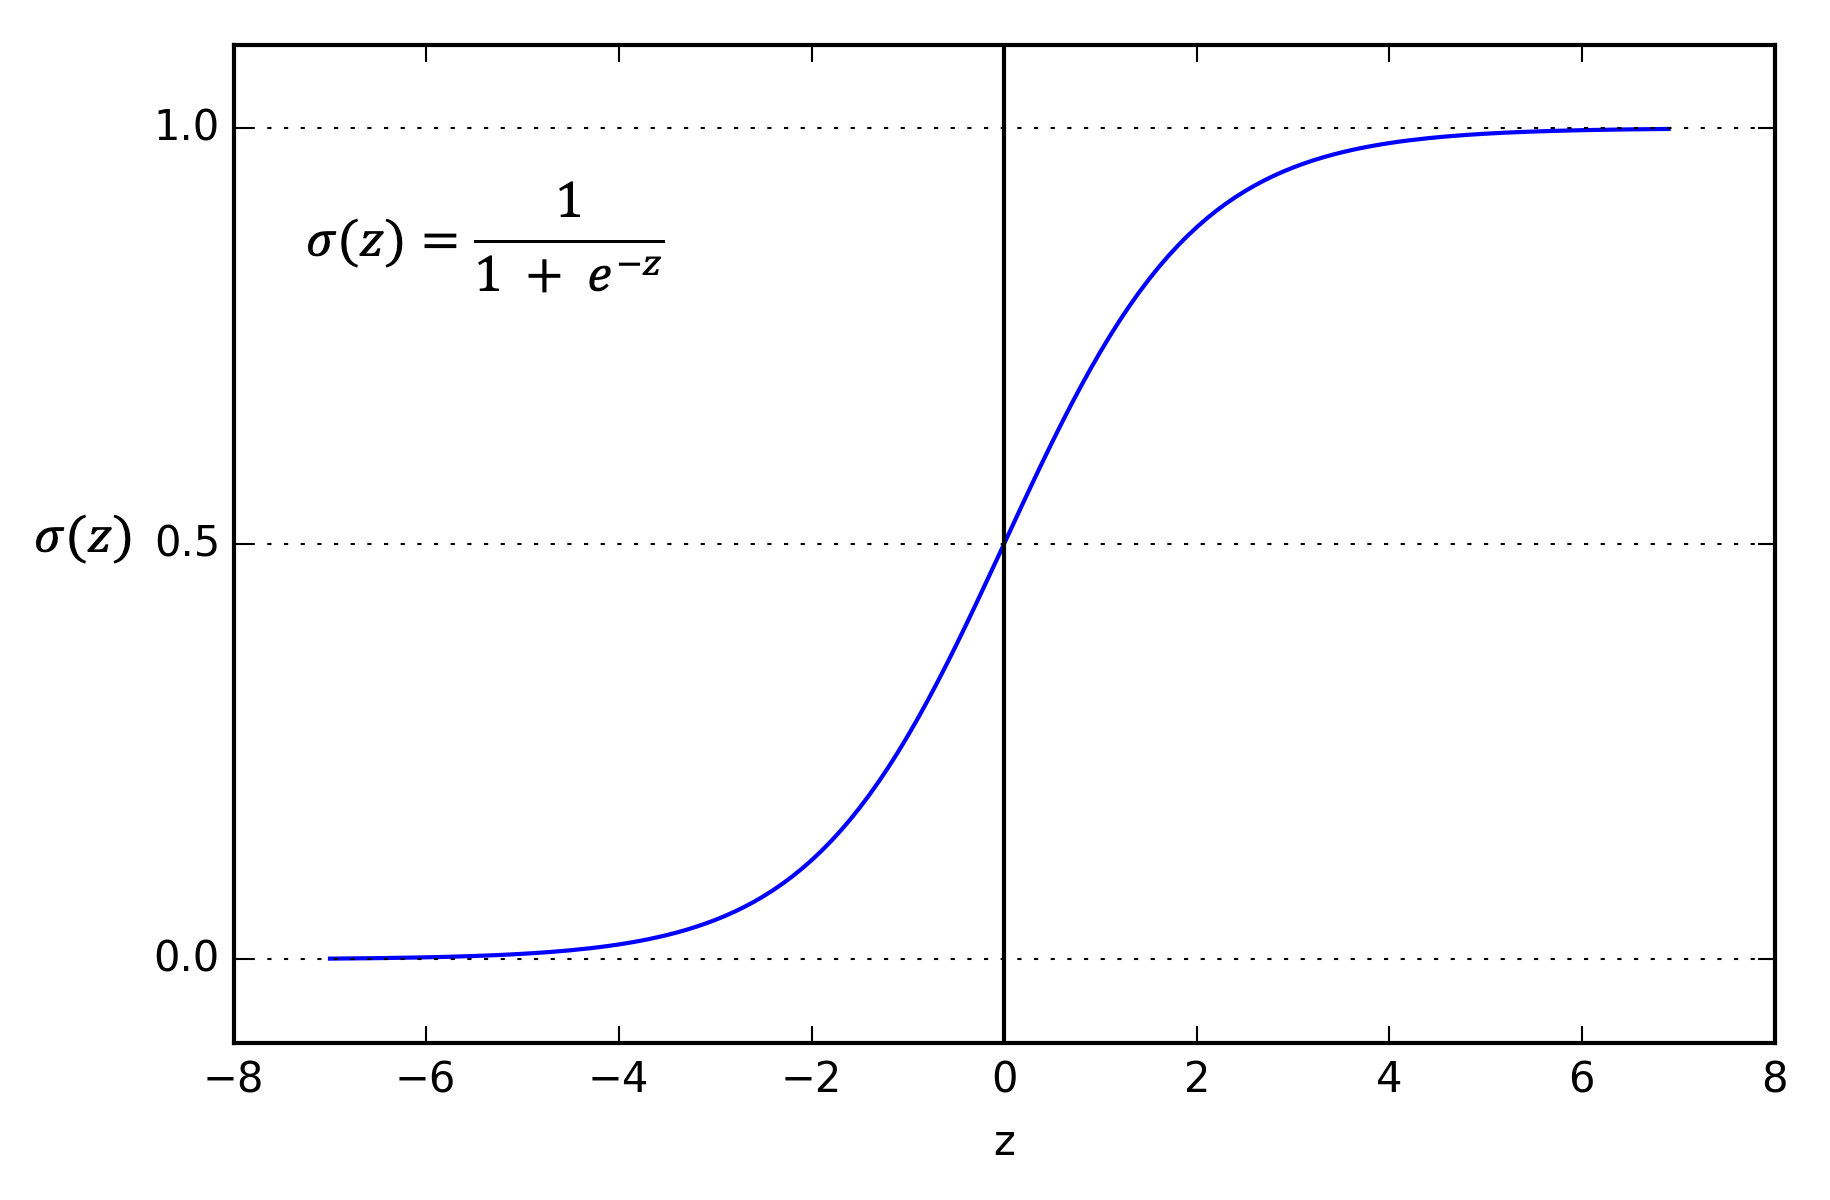

In [ ]:
Image(filename='/content/drive/MyDrive/ML_Exercise3/figures/11_03.png', width=500)

## Activating a neural network via forward propagation

# Classifying handwritten digits

## Obtaining and preparing the MNIST dataset

The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts:

- Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB unzipped, 60,000 examples)
- Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB unzipped, 60,000 labels)
- Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB, 10,000 examples)
- Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB unzipped, 10,000 labels)



In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 784) (10000, 784)
(60000,) (10000,)


In [ ]:
# Combine train and test data
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

print(X.shape)  # Should print (70000, 784)
print(y.shape)  # Should print (70000,)

(70000, 784)
(70000,)


Normalize to [-1, 1] range:

In [ ]:
print(np.unique(X))

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

In [ ]:
print(np.unique(X * 255))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [ ]:
X = np.clip((X - 0.5) * 2, -1, 1)

In [ ]:
print(np.unique(X))

[-1.         -0.99215686 -0.98431373 -0.97647059 -0.96862745 -0.96078431
 -0.95294118 -0.94509804 -0.9372549  -0.92941176 -0.92156863 -0.91372549
 -0.90588235 -0.89803922 -0.89019608 -0.88235294 -0.8745098  -0.86666667
 -0.85882353 -0.85098039 -0.84313725 -0.83529412 -0.82745098 -0.81960784
 -0.81176471 -0.80392157 -0.79607843 -0.78823529 -0.78039216 -0.77254902
 -0.76470588 -0.75686275 -0.74901961 -0.74117647 -0.73333333 -0.7254902
 -0.71764706 -0.70980392 -0.70196078 -0.69411765 -0.68627451 -0.67843137
 -0.67058824 -0.6627451  -0.65490196 -0.64705882 -0.63921569 -0.63137255
 -0.62352941 -0.61568627 -0.60784314 -0.6        -0.59215686 -0.58431373
 -0.57647059 -0.56862745 -0.56078431 -0.55294118 -0.54509804 -0.5372549
 -0.52941176 -0.52156863 -0.51372549 -0.50588235 -0.49803922 -0.49019608
 -0.48235294 -0.4745098  -0.46666667 -0.45882353 -0.45098039 -0.44313725
 -0.43529412 -0.42745098 -0.41960784 -0.41176471 -0.40392157 -0.39607843
 -0.38823529 -0.38039216 -0.37254902 -0.36470588 -0.3

In [ ]:
print("Min value:", np.min(X))  # Should be -1
print("Max value:", np.max(X))  # Should be 1

Min value: -1.0
Max value: 1.0


Visualize the first digit of each class:

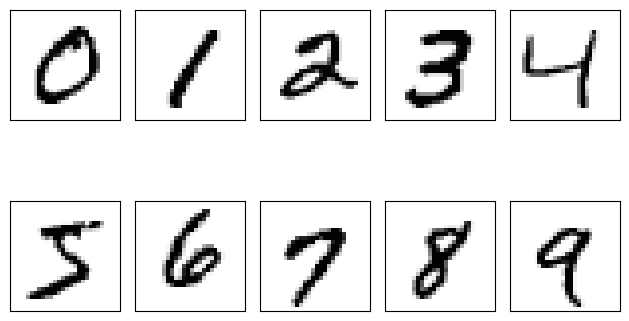

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('figures/11_4.png', dpi=300)
plt.show()

Visualize 25 different versions of "7":

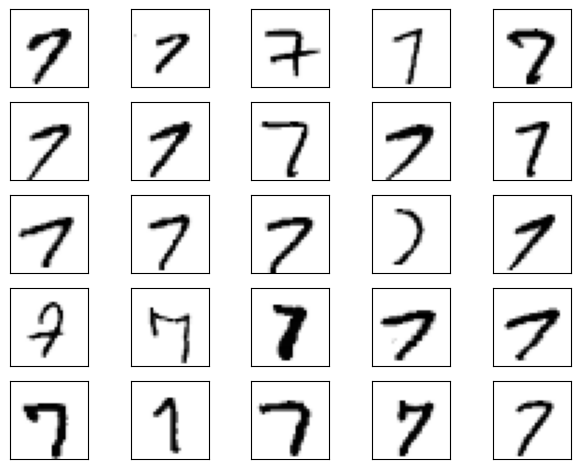

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X[y == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('figures/11_5.png', dpi=300)
plt.show()

Split into training, validation, and test set - **New splitted data as was required at assignment 3**:

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=123, stratify=y_temp)


# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

In [ ]:
print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(44100, 784) (4900, 784)
(44100,) (4900,)


# Common Functions

Defining data loaders:

In [ ]:
num_epochs = 50
minibatch_size = 100


def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size
                           + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]

        yield X[batch_idx], y[batch_idx]


# iterate over training epochs
for i in range(num_epochs):

    # iterate over minibatches
    minibatch_gen = minibatch_generator(
        X_train, y_train, minibatch_size)

    for X_train_mini, y_train_mini in minibatch_gen:

        break

    break

print(X_train_mini.shape)
print(y_train_mini.shape)

(100, 784)
(100,)


Compute mse and acc metrics for the entire dataset:

In [ ]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)


def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)

Compute mse and acc metrics in minibatches:

In [ ]:
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)

    for i, (features, targets) in enumerate(minibatch_gen):

        probas = nnet.forward(features)[-1]
        predicted_labels = np.argmax(probas, axis=1)

        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()

        num_examples += targets.shape[0]
        mse += loss

    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc

Compute roc and auc metrics:

In [ ]:
def compute_roc_and_auc(nnet, X, y, num_labels=10, minibatch_size=100, is_keras=False):
    """
    Compute the ROC curve and AUC for a neural network or Keras model.

    Args:
        nnet: Neural network object with a `forward` method or a Keras model.
        X: Feature matrix.
        y: True labels (not one-hot encoded).
        num_labels: Number of classes.
        minibatch_size: Size of minibatches for computation (ignored for Keras models).
        is_keras: Boolean flag to indicate if the model is a Keras model.

    Returns:
        auc: The macro-average AUC score.
        roc_data: A dictionary containing FPR, TPR, and thresholds for each class.
    """
    y_true = []
    y_pred_proba = []

    if is_keras:
        # For Keras models, use predict directly
        y_true = y
        y_pred_proba = nnet.predict(X)  # Predict the probabilities
    else:
        # For custom neural networks, use minibatch generator and forward pass
        minibatch_gen = minibatch_generator(X, y, minibatch_size)
        for features, targets in minibatch_gen:
            outputs = nnet.forward(features)  # Handle 1HL or 2HL outputs
            probas = outputs[-1]  # Probabilities are always the last output
            y_true.extend(targets)
            y_pred_proba.extend(probas)

    y_true = np.array(y_true)
    y_pred_proba = np.array(y_pred_proba)

    # Compute ROC curve and AUC for each class
    roc_data = {}
    auc = roc_auc_score(int_to_onehot(y_true, num_labels), y_pred_proba, multi_class="ovr", average="macro")

    for i in range(num_labels):
        fpr, tpr, thresholds = roc_curve(int_to_onehot(y_true, num_labels)[:, i], y_pred_proba[:, i])
        roc_data[i] = {"fpr": fpr, "tpr": tpr, "thresholds": thresholds}

    return auc, roc_data


def plot_roc_for_all_classes(roc_data, num_labels):
    """
    Plot the ROC curves for all classes in a single plot.

    Args:
        roc_data: Dictionary containing FPR, TPR, and thresholds for each class.
        num_labels: Number of classes.
    """
    plt.figure(figsize=(10, 8))

    for i in range(num_labels):
        fpr = roc_data[i]["fpr"]
        tpr = roc_data[i]["tpr"]
        plt.plot(fpr, tpr, label=f"Class {i} ROC")

    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curves for All Classes")
    plt.legend()
    plt.grid()
    plt.show()

Compute cross-entropy metric:

In [ ]:
def cross_entropy_loss(targets, probas, num_labels=10, epsilon=1e-12):
    """
    Compute categorical cross-entropy loss.

    Args:
        targets: True labels (integer format).
        probas: Predicted probabilities (softmax output).
        num_labels: Number of classes.
        epsilon: Small value to prevent log(0).

    Returns:
        Cross-entropy loss.
    """
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)

    # Clip probabilities to prevent log(0)
    probas = np.clip(probas, epsilon, 1. - epsilon)

    # Compute categorical cross-entropy
    return -np.mean(np.sum(onehot_targets * np.log(probas), axis=1))

Compute Accuracy and Cross-Entropy:

In [ ]:
def compute_ce_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    ce, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)

    for i, (features, targets) in enumerate(minibatch_gen):
        probas = nnet.forward(features)[-1]
        predicted_labels = np.argmax(probas, axis=1)

        # Compute Cross-Entropy loss
        ce += cross_entropy_loss(targets, probas, num_labels=num_labels)

        correct_pred += (predicted_labels == targets).sum()
        num_examples += targets.shape[0]

    ce = ce / (i + 1)
    acc = correct_pred / num_examples
    return ce, acc

# Original Case - 1 Hidden Layer

## Check MNIST dataset

In [ ]:
# Print shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (44100, 784) (44100,)
Validation set shape: (4900, 784) (4900,)
Test set shape: (21000, 784) (21000,)


## Implementing a multi-layer perceptron (1 hidden layer)

In [ ]:
##########################
### MODEL
##########################

def relu(z):
    return np.maximum(0, z)  # ReLU activation function

def relu_derivative(z):
    return (z > 0).astype(float)  # ReLU derivative

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Softmax for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

class NeuralNetMLP:

    def __init__(self, num_features, num_hidden, num_classes, random_seed=42):
        super().__init__()

        self.num_classes = num_classes

        # Hidden layer initialization with He initialization (for ReLU)
        rng = np.random.RandomState(random_seed)
        self.weight_h = rng.normal(
            loc=0.0, scale=np.sqrt(2. / num_features), size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)

        # Output layer initialization
        self.weight_out = rng.normal(
            loc=0.0, scale=np.sqrt(2. / num_hidden), size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)

    def forward(self, x):
        # Hidden layer using ReLU
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = relu(z_h)

        # Output layer using Softmax
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = softmax(z_out)
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):

        #########################
        ### Output layer weights
        #########################

        # One-hot encoding
        y_onehot = int_to_onehot(y, self.num_classes)

        # Compute gradient for the output layer using cross-entropy loss
        delta_out = (a_out - y_onehot) / y.shape[0]  # Cross-entropy derivative

        # Gradient for output weights
        d_loss__dw_out = np.dot(delta_out.T, a_h)  # [n_classes, n_hidden]
        d_loss__db_out = np.sum(delta_out, axis=0)  # [n_classes]

        #################################
        ### Hidden layer weights
        #################################

        # Backpropagate through the hidden layer
        d_loss__a_h = np.dot(delta_out, self.weight_out)  # [n_examples, n_hidden]

        # Compute ReLU derivative for hidden layer
        d_a_h__d_z_h = relu_derivative(a_h)  # ReLU derivative

        # Compute weight updates for hidden layer
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, x)  # [n_hidden, n_features]
        d_loss__d_b_h = np.sum(d_loss__a_h * d_a_h__d_z_h, axis=0)  # [n_hidden]

        return d_loss__dw_out, d_loss__db_out, d_loss__d_w_h, d_loss__d_b_h

In [ ]:
model_1HL = NeuralNetMLP(num_features=28*28,
                     num_hidden=50,
                     num_classes=10)

## Coding the neural network training loop

Defining a function to compute the loss and accuracy

In [ ]:
valid_ce, valid_acc = compute_ce_and_acc(model_1HL, X_valid, y_valid)

print(f"Initial validation Accuracy: {valid_acc*100:.2f}%")
print(f"Initial validation Cross-Entropy Loss: {valid_ce:.6f}")

Initial validation Accuracy: 9.86%
Initial validation Cross-Entropy Loss: 3.482406


In [ ]:
def train_model_1HL(model, X_train, y_train, X_valid, y_valid, num_epochs,
                    learning_rate=0.1, minibatch_size=100):
    epoch_ce = []
    epoch_train_acc = []
    epoch_valid_acc = []

    for epoch in range(num_epochs):
        minibatch_gen = minibatch_generator(X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:

            # Forward pass
            a_h, a_out = model.forward(X_train_mini)

            # Backward pass (compute gradients)
            d_w_out, d_b_out, d_w_h, d_b_h = model.backward(X_train_mini, a_h, a_out, y_train_mini)

            # Update weights and biases
            model.weight_h -= learning_rate * d_w_h
            model.bias_h -= learning_rate * d_b_h
            model.weight_out -= learning_rate * d_w_out
            model.bias_out -= learning_rate * d_b_out

        # Compute training and validation performance
        train_ce, train_acc = compute_ce_and_acc(model, X_train, y_train)
        valid_ce, valid_acc = compute_ce_and_acc(model, X_valid, y_valid)

        # Store metrics
        epoch_ce.append(train_ce)
        epoch_train_acc.append(train_acc * 100)
        epoch_valid_acc.append(valid_acc * 100)

        # Print epoch summary
        print(f"Epoch {epoch+1:03d}/{num_epochs:03d} "
              f"| Train CE: {train_ce:.4f} "
              f"| Train Acc: {train_acc*100:.2f}% "
              f"| Valid Acc: {valid_acc*100:.2f}%")

    return epoch_ce, epoch_train_acc, epoch_valid_acc

In [ ]:
np.random.seed(42) # for the training set shuffling

epoch_loss, epoch_train_acc, epoch_valid_acc = train_model_1HL(
    model_1HL, X_train, y_train, X_valid, y_valid,
    num_epochs=50, learning_rate=0.1)

Epoch 001/050 | Train CE: 0.3760 | Train Acc: 88.37% | Valid Acc: 88.63%
Epoch 002/050 | Train CE: 0.3036 | Train Acc: 90.79% | Valid Acc: 91.04%
Epoch 003/050 | Train CE: 0.2704 | Train Acc: 92.19% | Valid Acc: 91.71%
Epoch 004/050 | Train CE: 0.2267 | Train Acc: 93.14% | Valid Acc: 92.82%
Epoch 005/050 | Train CE: 0.2082 | Train Acc: 93.63% | Valid Acc: 93.22%
Epoch 006/050 | Train CE: 0.1773 | Train Acc: 94.87% | Valid Acc: 94.20%
Epoch 007/050 | Train CE: 0.1992 | Train Acc: 93.98% | Valid Acc: 93.65%
Epoch 008/050 | Train CE: 0.1804 | Train Acc: 94.61% | Valid Acc: 94.04%
Epoch 009/050 | Train CE: 0.1623 | Train Acc: 95.13% | Valid Acc: 94.69%
Epoch 010/050 | Train CE: 0.1500 | Train Acc: 95.63% | Valid Acc: 94.80%
Epoch 011/050 | Train CE: 0.1505 | Train Acc: 95.35% | Valid Acc: 94.29%
Epoch 012/050 | Train CE: 0.1382 | Train Acc: 95.81% | Valid Acc: 95.29%
Epoch 013/050 | Train CE: 0.1544 | Train Acc: 95.26% | Valid Acc: 94.43%
Epoch 014/050 | Train CE: 0.1266 | Train Acc: 96.16

## Evaluating the neural network performance

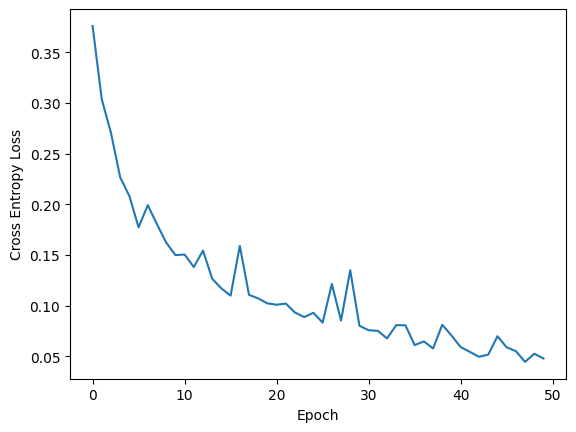

In [ ]:
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epoch')
#plt.savefig('figures/11_07.png', dpi=300)
plt.show()

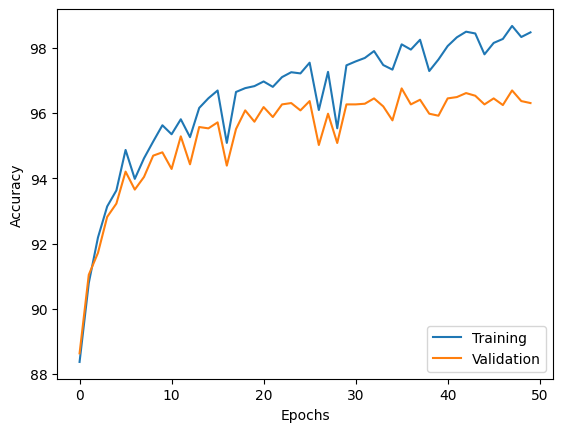

In [ ]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

In [ ]:
test_ce, test_acc = compute_ce_and_acc(model_1HL, X_test, y_test)

print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Test Cross-Entropy Loss: {test_ce:.6f}")

Test accuracy: 96.09%
Test Cross-Entropy Loss: 0.148916


In [ ]:
auc, roc_data = compute_roc_and_auc(nnet=model_1HL, X=X_test, y=y_test, num_labels=10)
print(f"Macro AUC: {auc:.4f}")

Macro AUC: 0.9985


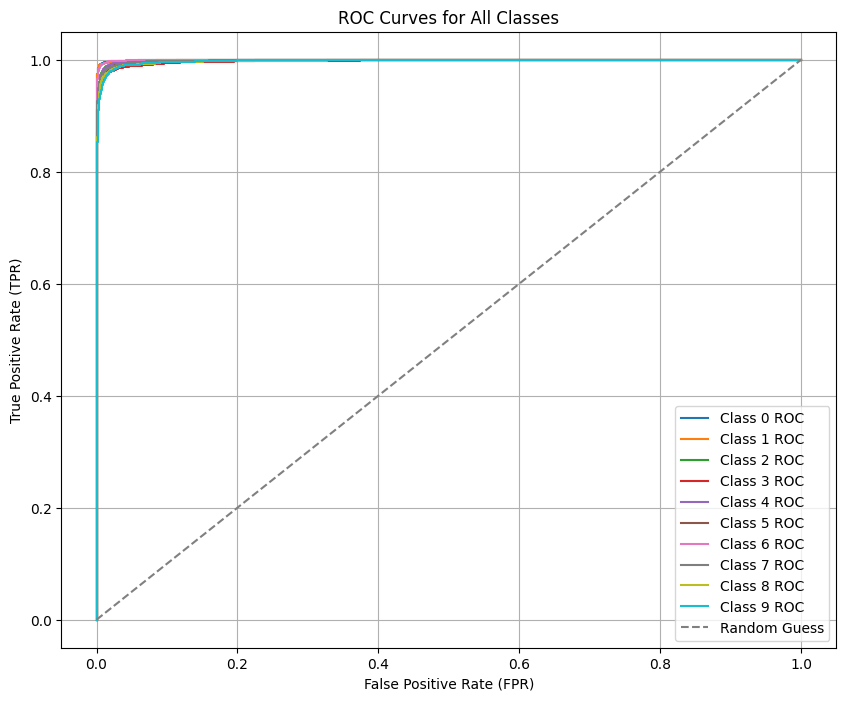

In [ ]:
# Plot ROC curves for all classes
plot_roc_for_all_classes(roc_data, num_labels=10)

Plot failure cases:

In [ ]:
X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]

_, probas = model_1HL.forward(X_test_subset)
test_pred = np.argmax(probas, axis=1)

misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels = y_test_subset[y_test_subset != test_pred][:25]

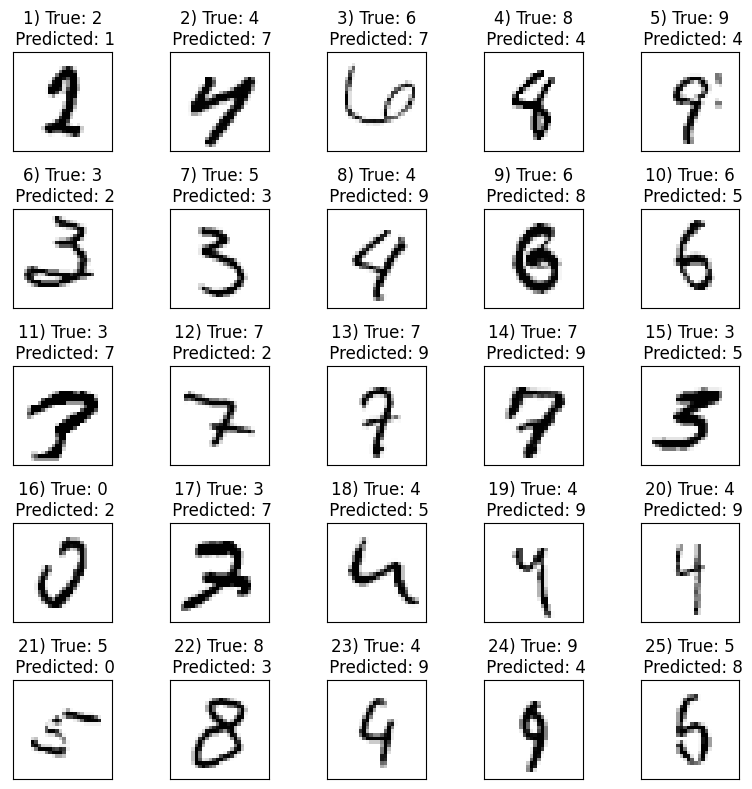

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5,
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels[i]}\n'
                    f' Predicted: {misclassified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('figures/11_09.png', dpi=300)
plt.show()

# **Task 2 + Task 3 (Building the 2-Hidden-Layers model and implement it)**

Task 2:

Given the code of chapter 11 that can be found in:
https://github.com/rasbt/machine-learning-book/blob/main/ch11/ch11.ipynb
your main goal is to extend the code to address two hidden layers (instead of a single hidden layer). Extend the code by creating a local copy of the ch11.ipynb, perform the revisions, and submit the GitHub link to your revised code.


Task 3:

Apply the code of section 2 with the two layers for classifying handwritten digits MNIST dataset using the same full ANN architecture presented in the class (see “Solution 1: A plain deep NN”) and evaluate its prediction performance (macro AUC) using Train(70%)/Test(30%) validation procedure.

## Check MNIST dataset

Check that the same dataset is used for the Task 2.

In [ ]:
# Print shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (44100, 784) (44100,)
Validation set shape: (4900, 784) (4900,)
Test set shape: (21000, 784) (21000,)


## Implementing the 2-hidden layer model

In [ ]:
##########################
### MODEL (2 Hidden Layers)
##########################

def relu(z):
    return np.maximum(0, z)  # ReLU activation


def sigmoid(z):
    return 1. / (1. + np.exp(-z))


def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Avoid numerical instability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary


class NeuralNetMLP:

    def __init__(self, num_features, num_hidden1, num_hidden2, num_classes, random_seed=42):
        super().__init__()

        self.num_classes = num_classes

        rng = np.random.RandomState(random_seed)

        # First hidden layer
        self.weight_h1 = rng.normal(loc=0.0, scale=np.sqrt(2. / num_features), size=(num_hidden1, num_features))
        self.bias_h1 = np.zeros(num_hidden1)

        # Second hidden layer
        self.weight_h2 = rng.normal(loc=0.0, scale=np.sqrt(2. / num_hidden1), size=(num_hidden2, num_hidden1))
        self.bias_h2 = np.zeros(num_hidden2)

        # Output layer
        self.weight_out = rng.normal(loc=0.0, scale=np.sqrt(2. / num_hidden2), size=(num_classes, num_hidden2))
        self.bias_out = np.zeros(num_classes)

    def forward(self, x):
        # First hidden layer
        z_h1 = np.dot(x, self.weight_h1.T) + self.bias_h1
        a_h1 = relu(z_h1)

        # Second hidden layer
        z_h2 = np.dot(a_h1, self.weight_h2.T) + self.bias_h2
        a_h2 = relu(z_h2)

        # Output layer
        z_out = np.dot(a_h2, self.weight_out.T) + self.bias_out
        a_out = softmax(z_out)

        return a_h1, a_h2, a_out

    def backward(self, x, a_h1, a_h2, a_out, y):
        y_onehot = int_to_onehot(y, self.num_classes)

        # Compute gradient for output layer using Cross-Entropy Loss
        delta_out = (a_out - y_onehot) / y.shape[0]  # Cross-Entropy Loss gradient

        d_loss__dw_out = np.dot(delta_out.T, a_h2)  # Gradient for output weights
        d_loss__db_out = np.sum(delta_out, axis=0)  # Gradient for output biases

        # Compute gradients for second hidden layer using ReLU
        d_loss__a_h2 = np.dot(delta_out, self.weight_out)  # Backpropagate error
        d_a_h2__d_z_h2 = (a_h2 > 0).astype(float)  # ReLU derivative
        delta_h2 = d_loss__a_h2 * d_a_h2__d_z_h2

        d_loss__dw_h2 = np.dot(delta_h2.T, a_h1)
        d_loss__db_h2 = np.sum(delta_h2, axis=0)

        # Corrected: Compute gradients for first hidden layer using ReLU
        d_loss__a_h1 = np.dot(delta_h2, self.weight_h2)  # Backpropagate error
        d_a_h1__d_z_h1 = (a_h1 > 0).astype(float)  # ReLU derivative
        delta_h1 = d_loss__a_h1 * d_a_h1__d_z_h1

        d_loss__dw_h1 = np.dot(delta_h1.T, x)
        d_loss__db_h1 = np.sum(delta_h1, axis=0)

        return d_loss__dw_out, d_loss__db_out, d_loss__dw_h2, d_loss__db_h2, d_loss__dw_h1, d_loss__db_h1

In [ ]:
model_2HL = NeuralNetMLP(num_features=28*28,
                     num_hidden1=50,   # First hidden layer size
                     num_hidden2=50,   # Second hidden layer size
                     num_classes=10)

## Coding the neural network training loop

In [ ]:
print(X_train_mini.shape)
print(y_train_mini.shape)

(100, 784)
(100,)


In [ ]:
valid_ce, valid_acc = compute_ce_and_acc(model_2HL, X_valid, y_valid)

print(f"Validation accuracy: {valid_acc*100:.2f}%")
print(f"Validation Cross-Entropy Loss: {valid_ce:.6f}")

Validation accuracy: 10.96%
Validation Cross-Entropy Loss: 2.886027


In [ ]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs,
          learning_rate=0.1, minibatch_size=100):

    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []

    for epoch in range(num_epochs):
        minibatch_gen = minibatch_generator(X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:

            # Forward pass
            a_h1, a_h2, a_out = model.forward(X_train_mini)

            # Backward pass (compute gradients using cross-entropy loss)
            (d_w_out, d_b_out,
             d_w_h2, d_b_h2,
             d_w_h1, d_b_h1) = model.backward(X_train_mini, a_h1, a_h2, a_out, y_train_mini)

            # Update weights and biases
            model.weight_h1 -= learning_rate * d_w_h1
            model.bias_h1 -= learning_rate * d_b_h1

            model.weight_h2 -= learning_rate * d_w_h2
            model.bias_h2 -= learning_rate * d_b_h2

            model.weight_out -= learning_rate * d_w_out
            model.bias_out -= learning_rate * d_b_out

        # Compute training and validation performance using Cross-Entropy Loss
        train_ce, train_acc = compute_ce_and_acc(model, X_train, y_train)
        valid_ce, valid_acc = compute_ce_and_acc(model, X_valid, y_valid)

        # Store metrics
        epoch_loss.append(train_ce)
        epoch_train_acc.append(train_acc * 100)
        epoch_valid_acc.append(valid_acc * 100)

        # Print epoch summary
        print(f"Epoch {epoch+1:03d}/{num_epochs:03d} "
              f"| Train CE: {train_ce:.4f} "
              f"| Train Acc: {train_acc*100:.2f}% "
              f"| Valid Acc: {valid_acc*100:.2f}%")

    return epoch_loss, epoch_train_acc, epoch_valid_acc

In [ ]:
np.random.seed(42)

epoch_loss, epoch_train_acc, epoch_valid_acc = train(
    model_2HL, X_train, y_train, X_valid, y_valid,
    num_epochs=50, learning_rate=0.1)

Epoch 001/050 | Train CE: 0.3675 | Train Acc: 88.57% | Valid Acc: 88.45%
Epoch 002/050 | Train CE: 0.2694 | Train Acc: 91.77% | Valid Acc: 91.49%
Epoch 003/050 | Train CE: 0.2291 | Train Acc: 92.94% | Valid Acc: 92.61%
Epoch 004/050 | Train CE: 0.2538 | Train Acc: 91.83% | Valid Acc: 91.39%
Epoch 005/050 | Train CE: 0.1989 | Train Acc: 93.83% | Valid Acc: 93.63%
Epoch 006/050 | Train CE: 0.1930 | Train Acc: 94.27% | Valid Acc: 93.71%
Epoch 007/050 | Train CE: 0.2192 | Train Acc: 93.06% | Valid Acc: 92.41%
Epoch 008/050 | Train CE: 0.1507 | Train Acc: 95.33% | Valid Acc: 94.65%
Epoch 009/050 | Train CE: 0.1407 | Train Acc: 95.67% | Valid Acc: 94.96%
Epoch 010/050 | Train CE: 0.1864 | Train Acc: 94.19% | Valid Acc: 93.82%
Epoch 011/050 | Train CE: 0.1355 | Train Acc: 95.86% | Valid Acc: 95.20%
Epoch 012/050 | Train CE: 0.1256 | Train Acc: 95.98% | Valid Acc: 94.94%
Epoch 013/050 | Train CE: 0.1407 | Train Acc: 95.55% | Valid Acc: 94.63%
Epoch 014/050 | Train CE: 0.1382 | Train Acc: 95.53

## Evaluating the neural network performance

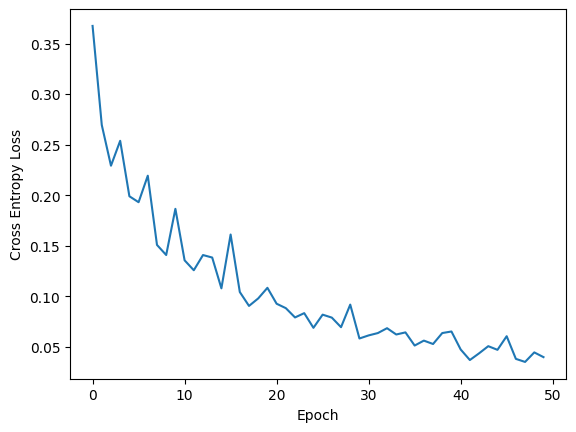

In [ ]:
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epoch')
#plt.savefig('figures/11_07.png', dpi=300)
plt.show()

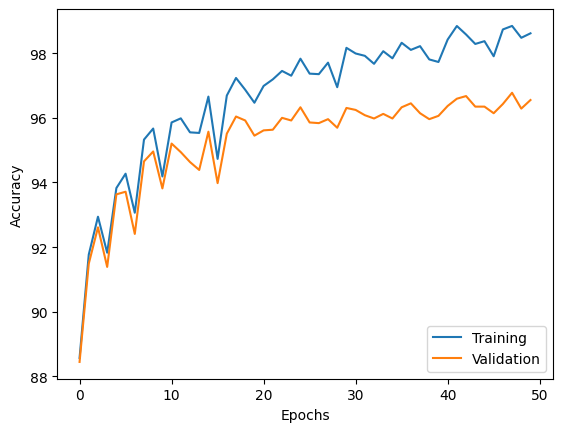

In [ ]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

In [ ]:
test_ce, test_acc = compute_ce_and_acc(model_2HL, X_test, y_test)

print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Test Cross-Entropy Loss: {test_ce:.6f}")

Test accuracy: 96.20%
Test Cross-Entropy Loss: 0.156524


In [ ]:
auc, roc_data = compute_roc_and_auc(nnet=model_2HL, X=X_test, y=y_test, num_labels=10)
print(f"Macro AUC: {auc:.4f}")

Macro AUC: 0.9988


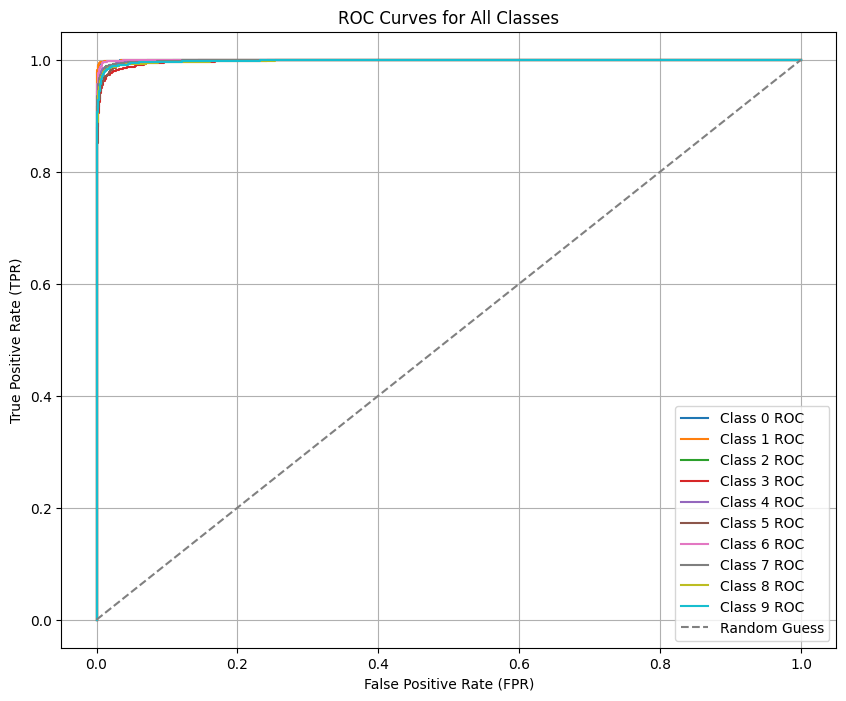

In [ ]:
# Plot ROC curves for all classes
plot_roc_for_all_classes(roc_data, num_labels=10)

Plot failure cases:

In [ ]:
X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]

_, _, probas = model_2HL.forward(X_test_subset)
test_pred = np.argmax(probas, axis=1)

misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels = y_test_subset[y_test_subset != test_pred][:25]

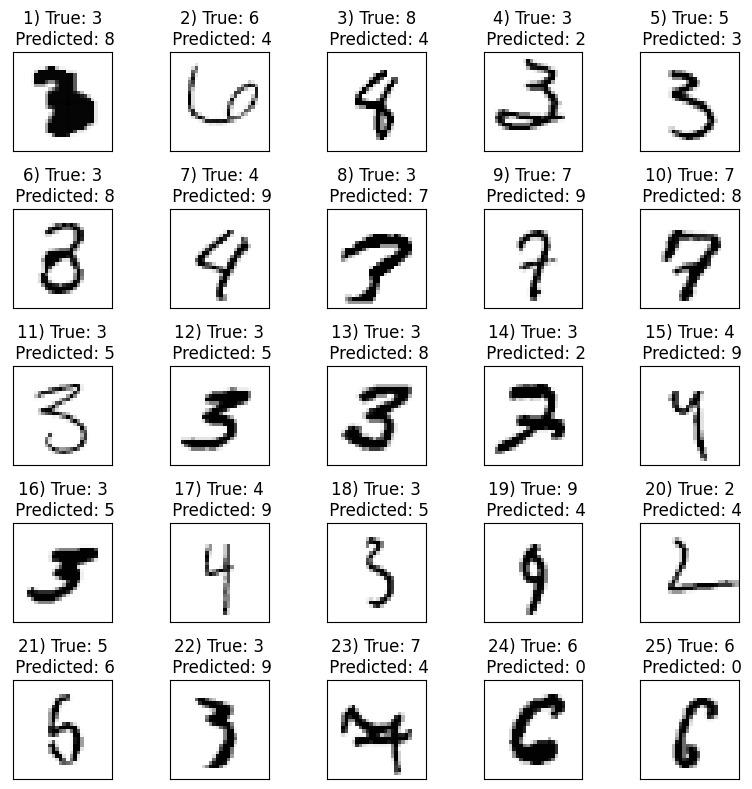

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5,
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels[i]}\n'
                    f' Predicted: {misclassified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('figures/11_09.png', dpi=300)
plt.show()

# **Task 4 - Keras**

Compare the predictive performance of section 3 with the original (single hidden layer) code and with the fully connected ANN implemented in Keras/TensorFlow/PyTorch (choose one).

## Check MNIST dataset

In [ ]:
# Print shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (44100, 784) (44100,)
Validation set shape: (4900, 784) (4900,)
Test set shape: (21000, 784) (21000,)


## Implementing fully connected ANN in Keras

In [ ]:
# One-Hot Encode Labels
y_train_oh = to_categorical(y_train, num_classes=10)
y_valid_oh = to_categorical(y_valid, num_classes=10)

In [ ]:
# Define the Model
model_Keras = Sequential([
    Dense(50, activation='relu', input_shape=(784,)),  # Specify input shape
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model
model_Keras.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

## Coding the neural network training loop

In [ ]:
# Train the Model
history = model_Keras.fit(X_train, y_train_oh, batch_size=100, epochs=50, verbose=2, validation_data=(X_valid, y_valid_oh))

Epoch 1/50
441/441 - 2s - 5ms/step - accuracy: 0.8114 - loss: 0.5800 - val_accuracy: 0.9118 - val_loss: 0.2859
Epoch 2/50
441/441 - 3s - 6ms/step - accuracy: 0.9241 - loss: 0.2454 - val_accuracy: 0.9331 - val_loss: 0.2148
Epoch 3/50
441/441 - 3s - 6ms/step - accuracy: 0.9415 - loss: 0.1919 - val_accuracy: 0.9449 - val_loss: 0.1888
Epoch 4/50
441/441 - 2s - 4ms/step - accuracy: 0.9481 - loss: 0.1679 - val_accuracy: 0.9512 - val_loss: 0.1605
Epoch 5/50
441/441 - 1s - 3ms/step - accuracy: 0.9554 - loss: 0.1441 - val_accuracy: 0.9439 - val_loss: 0.1767
Epoch 6/50
441/441 - 1s - 3ms/step - accuracy: 0.9585 - loss: 0.1331 - val_accuracy: 0.9535 - val_loss: 0.1404
Epoch 7/50
441/441 - 1s - 3ms/step - accuracy: 0.9623 - loss: 0.1185 - val_accuracy: 0.9580 - val_loss: 0.1383
Epoch 8/50
441/441 - 2s - 6ms/step - accuracy: 0.9649 - loss: 0.1108 - val_accuracy: 0.9612 - val_loss: 0.1327
Epoch 9/50
441/441 - 1s - 3ms/step - accuracy: 0.9673 - loss: 0.1016 - val_accuracy: 0.9567 - val_loss: 0.1339
E

In [ ]:
# Print the model summary
model_Keras.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,312 (165.29 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Evaluating the neural network performance

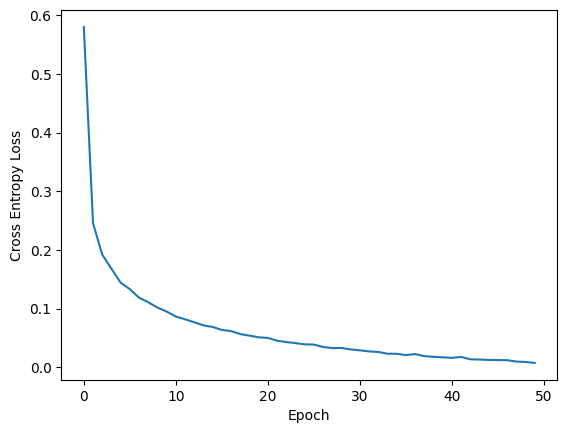

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.show()

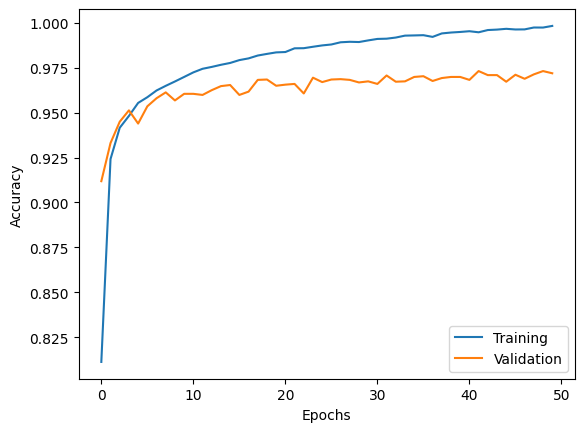

In [ ]:
# Plot training vs validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Convert y_test to one-hot encoded format
y_test_oh = to_categorical(y_test, num_classes=10)

In [ ]:
# Evaluate the model to get accuracy
test_loss, test_acc = model_Keras.evaluate(X_test, y_test_oh, verbose=0)

# Get model predictions (probabilities)
y_pred_proba = model_Keras.predict(X_test)

# Compute Cross-Entropy Loss manually
test_ce = -np.mean(np.sum(y_test_oh * np.log(y_pred_proba + 1e-12), axis=1))

# Print results
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Test Cross-Entropy Loss: {test_ce:.6f}")

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test accuracy: 96.85%
Test Cross-Entropy Loss: 0.143157


In [ ]:
# Compute ROC and AUC for a custom neural network
auc, roc_data = compute_roc_and_auc(nnet=model_Keras, X=X_test, y=y_test, num_labels=10, minibatch_size=100, is_keras=True)
print(f"Macro AUC (Custom NN): {auc:.4f}")

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro AUC (Custom NN): 0.9991


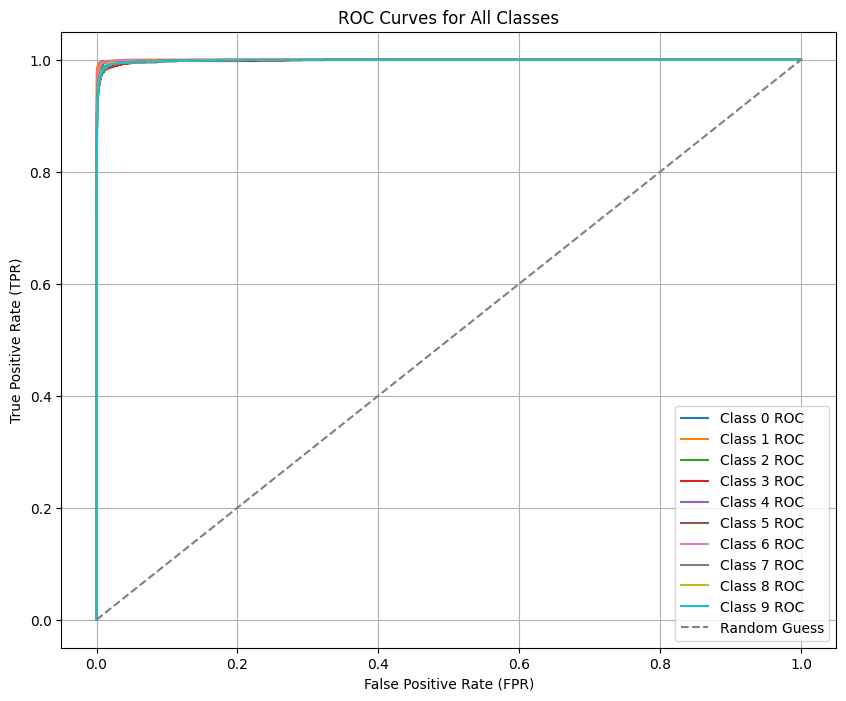

In [ ]:
# Plot ROC curves for all classes
plot_roc_for_all_classes(roc_data, num_labels=10)

Plot failure cases:

In [ ]:
# Get predictions for misclassification analysis
X_test_subset = X_test[:1000]
y_test_subset = y_test[:1000]

# Get predictions
probas = model_Keras.predict(X_test_subset, verbose=0)
test_pred = np.argmax(probas, axis=1)
true_labels = np.argmax(y_test_subset, axis=1) if len(y_test_subset.shape) > 1 else y_test_subset

# Find misclassified examples
misclassified_indices = np.where(true_labels != test_pred)[0]
misclassified_images = X_test_subset[misclassified_indices][:25]
misclassified_labels = test_pred[misclassified_indices][:25]
correct_labels = true_labels[misclassified_indices][:25]

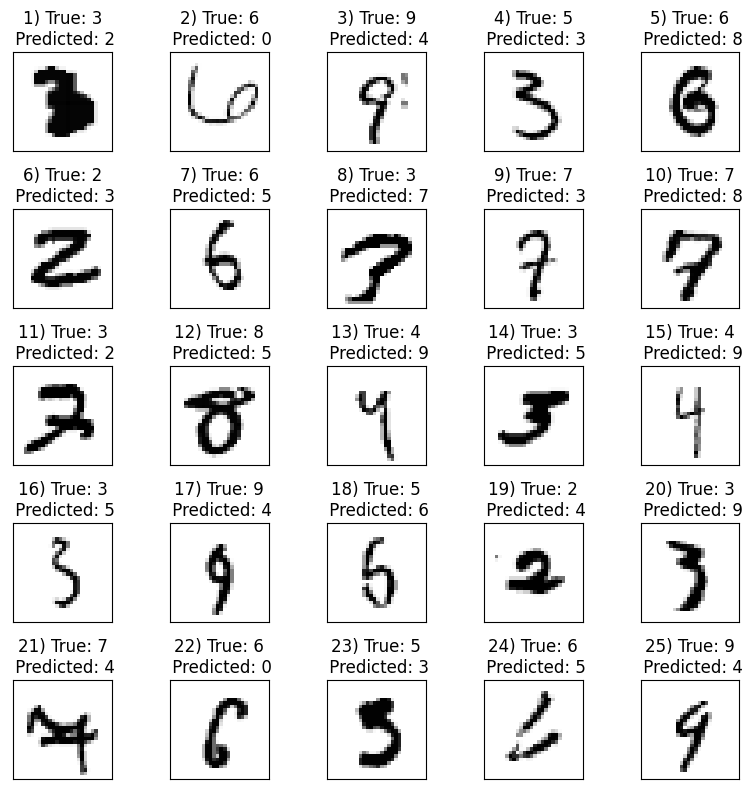

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5,
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels[i]}\n'
                    f' Predicted: {misclassified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()